# 3. Quantum Channels
We discuss some points about Quantum Channels - paths(evolution) from one state(density matrix) to another for a general open system(represented by a density operator).

- ### The Kraus representation of a general evolution.
Turns out, any evolution of a density operator can be written in the following form:
$$\rho \rightarrow \sum_i E_i\rho E_i^{\dagger}$$
for suitably chosen $E_i$ s that are also constrained so that the resultant summation is a valid density operator.

The set $\{E_i\}_i$ is called a **Kraus Representation** of the channel that "$\rho$ goes through".

Theorem: The necessary and sufficient constraint on the operators $E_i$ is $$\sum_i E_i^{\dagger}E_i = I$$
Proof: Let $\rho' = \sum_i E_i\rho E_i^{\dagger}$. Then for arbitrary $|u\rangle, |v\rangle$ we have
$$ \langle u|\rho'v\rangle = \sum_i \langle u|E_i\rho E_i^{\dagger} v\rangle = \sum_i \langle E_i^{\dagger} u|\rho E_i^{\dagger} v\rangle = \sum_i \langle u'|\rho v'\rangle \geq 0$$
so that $\rho'$ is always positive. 
Next, we should have $\text{tr} (\rho') = \text{tr}(\rho) = 1$ or $$1 = \text{tr}(\rho') = \sum_i \text{tr}(E_i\rho E_i^{\dagger}) = \sum_i \text{tr}(\rho E_i^{\dagger}E_i) = \text{tr}\left[\rho \left(\sum_i E_i^{\dagger}E_i \right) \right] \iff \text{tr}\left[\rho\left(\sum_i E_i^{\dagger}E_i - I\right)\right] = 0 \quad (\star)$$
Let $P$ be the hermitian operator defined by  $P = \left(\sum_i E_i^{\dagger}E_i\right) - I$.  It has a spectral decomposition $P = \sum_j \lambda_j|j\rangle\langle j|$.

Now $(\star)$ should hold for any $\rho$, since $\rho$ is generic in the channel definition(much like a qubit operator is unitary since it preserves the norm of $|\psi\rangle$ for _any_ $|\psi\rangle$) and so in particular it should hold for $\rho = |j\rangle\langle j|$ for $|j\rangle$ being an orthonormal eigenbasis of $P$. Hence we have $$0 = \text{tr}(|j\rangle\langle j|P) = \text{tr}(\langle j|P|j\rangle) = \lambda_j \quad \forall j$$
so that $P = 0$  or  $\boxed{\sum_i E_i^{\dagger}E_i = I}$. Conversely, any set $E_i$ satisfying this relation clearly satisfies $\text{tr}(\rho') = 1$ and so is a valid Kraus representation for some channel. $\text{Q.E.D.}$

In [17]:
from qiskit import Aer, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector, visualize_transition

- ### Implementation of a simple Quantum Channel
We implement a quantum circuit that mimics the single qubit Quantum Channel taking the density matrix (the matrices are represented in the computational basis here) $\rho =  \begin{pmatrix}1 & 0 \\ 0 & 0\end{pmatrix}= |0\rangle\langle 0|$ to $\rho' = \frac{1}{2}\begin{pmatrix}1 & 0 \\ 0 & 1\end{pmatrix} = \frac{1}{2}|0\rangle\langle 0| + \frac{1}{2}|1\rangle\langle 1|$.

The motivation for the circuit comes from how this channel might be actually effected on a system - Consider a qubit in $|+\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}$ that accidentally got measured (or we measured it and discarded the result). Then its state is exactly $\rho'$ (it is in state $|0\rangle$ with probability $\frac{1}{2}$ and in state $|1\rangle$ with probability $\frac{1}{2}$. Getting from $\rho = |0\rangle\langle 0|$ to $|+\rangle\langle +|$ is easy - just apply a Hadamard transform to the qubit before the measurement. The circuit follows naturally now.

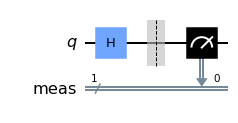

In [11]:
def simple_channel():
    ckt = QuantumCircuit(1)
    ckt.h(0)
    ckt.measure_all()
    return ckt

ckt = simple_channel()
ckt.draw(output="mpl")

#### Representing these states on the Bloch sphere:
Recall that $\vec r$ is the (well-defined) representation of $\rho = \frac{I + \vec r \cdot \vec \sigma}{2}$ on the Bloch Sphere. Also note that for $\vec r = (x, y, z)$, we have $\vec r \cdot \vec \sigma = \begin{pmatrix} z & x - \iota y \\ x + \iota y & -z \end{pmatrix}$. This allows us to quickly compute $\vec r$ for various density matrices.

For $\rho = \begin{pmatrix}1 & 0 \\ 0 & 0\end{pmatrix}$, we have $$\vec r \cdot \vec \sigma = 2\rho - I = \begin{pmatrix}1 & 0 \\ 0 & -1\end{pmatrix} = Z \implies x = y = 0, z = 1 \implies \vec r = (0, 0, 1)$$
Similarly, for $\rho' = \frac{I}{2}$ we get $\vec r = (0, 0, 0)$. It is now easy to plot these on the Bloch sphere. 

In qiskit, however, it is even simpler: The density matrix can itself be passed as an argument, it calculates $\vec r$ for us and plots it. 

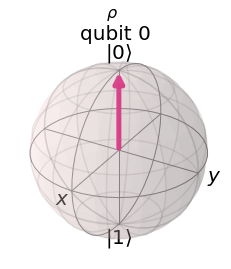

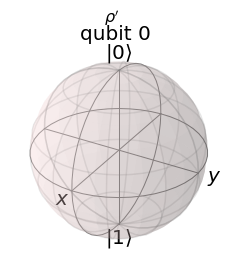

In [16]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

plot_bloch_multivector([[1, 0], [0, 0]], title="$\\rho$")
plot_bloch_multivector([[1/2, 0], [0, 1/2]], title="$\\rho'$")

- ### The Von-Neumann Entropy associated with a state
The Shannon entropy associated with a distribution is defined by $S = -\sum_i p_i \log{p_i}$. Now suppose the density matrix $\rho$ of a system is expressed as (it is positive and so has a spectral decomposition) $\rho = \sum_i \lambda_i |i\rangle\langle i|$. So $\rho$ can be thought of as the density matrix for a system which is in $|i\rangle$ with probability $\lambda_i$(valid since the $\lambda_i$'s are non-negative and sum to 1) and so the Shannon entropy of the state is given by $S_{\rho} = -\sum_i \lambda_i \log{\lambda_i}$, which has a very neat simplification into $-\text{tr}(\rho \log{\rho})$. Hence we get the Von-Neumann entropy associated with a quantum state to be $S_{\text{Von-Neumann}} = -\text{tr}(\rho \log \rho)$

Note that the Von-Neumann entropy is 0 for pure states and nonzero otherwise. In particular, upon measurement of a pure state in a superposition(and discarding the result), the entropy of the system increases from 0 to a positive quantity since it is now in a mixed state.

In our case for example, initially the state was $\rho = |0\rangle\langle 0|$ with an entropy of 0, and finally the state is $\rho' =  \frac{1}{2}|0\rangle\langle 0| + \frac{1}{2}|1\rangle\langle 1|$ with an entropy of $\log 2 > 0$.

The Von-Neumann entropy in its compact form literally throws the density operator formulation at us, but it isn't particularly convincing on its own. I suspect the main motivation has to do with the entropy of (bipartite) entanglement(which is the Von-Neumann entropy of the reduced density matrices of (any) one of the two subsystems) which clearly tells us that the idea of the density and reduced density operators is useful. I am not very familiar with the reduced density operators, so I'll leave it at that.

- ### Optional Problem
We plot the Bloch vectors of the states $\rho_p = \frac{1+p}{2}|0\rangle\langle 0| + \frac{1-p}{2}|1\rangle\langle 1|$ on the Bloch sphere as $p: -1 \rightarrow 1$.
We easily see $\rho_p = \frac{I + pZ}{2} = \frac{I + (0, 0, p) \cdot \vec \sigma}{2}$ so by uniqueness of Bloch representation the required vectors are $\vec r = (0, 0, p), p: -1 \rightarrow 1$. The trajectory is the line $x = y = 0, -1 \leq z \leq 1$ on the Bloch Sphere.